### Q17) Implement Simple Linear Regression on “Advertising” dataset using Analytical Method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Advertising.csv')
print("\n-*-*-*-*-*-*-*-* Linear Regression Model *-*-*-*-*-*-*-*-*-*-*\n")

df=df[['radio','sales']]
df.head()


-*-*-*-*-*-*-*-* Linear Regression Model *-*-*-*-*-*-*-*-*-*-*



,radio,sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9


In [3]:
x_mean=np.mean(df['radio'])
y_mean=np.mean(df['sales'])
print("\nx-mean:",round(x_mean,4),"\ty-mean:",round(y_mean,4))

df=pd.concat([df,pd.DataFrame((x-x_mean for x in df['radio']),columns=['x-x_mean']),pd.DataFrame((y-y_mean for y in df['sales']),columns=['y-y_mean'])],axis=1)
df=pd.concat([df,pd.DataFrame((x**2 for x in df['x-x_mean']),columns=['(x-x_mean)^2'])],axis=1)
print("\nFor calculating slope (m):\n",df)

m=np.sum(df['x-x_mean']*df['y-y_mean'])/np.sum(df['(x-x_mean)^2'])

print("\nEstimated values:")
print("\nSlope: ",round(m,4))
c=y_mean-m*x_mean
print("\nY-Intercept: ",round(c,4))


x-mean: 23.264 	y-mean: 14.0225

For calculating slope (m):
      radio  sales  x-x_mean  y-y_mean  (x-x_mean)^2
0     37.8   22.1    14.536    8.0775    211.295296
1     39.3   10.4    16.036   -3.6225    257.153296
2     45.9    9.3    22.636   -4.7225    512.388496
3     41.3   18.5    18.036    4.4775    325.297296
4     10.8   12.9   -12.464   -1.1225    155.351296
..     ...    ...       ...       ...           ...
195    3.7    7.6   -19.564   -6.4225    382.750096
196    4.9    9.7   -18.364   -4.3225    337.236496
197    9.3   12.8   -13.964   -1.2225    194.993296
198   42.0   25.5    18.736   11.4775    351.037696
199    8.6   13.4   -14.664   -0.6225    215.032896

[200 rows x 5 columns]

Estimated values:

Slope:  0.2025

Y-Intercept:  9.3116


In [4]:
x=np.array(df['radio'])
y=np.array(df['sales'])
y_pred=m*x+c

ssr=np.sum((y-y_pred)*(y-y_pred))
sst=np.sum((y-y_mean)*(y-y_mean))
accuracy=1-(ssr/sst)
print("Accuracy Score: ", accuracy)
var=np.mean(y-y_pred)
MSE=var*var
print("Mean Squared Error: ", MSE)
print("Root Mean Squared Error: ", np.sqrt(MSE))

Accuracy Score:  0.33203245544529525
Mean Squared Error:  5.8793014405216786e-30
Root Mean Squared Error:  2.424727085781342e-15


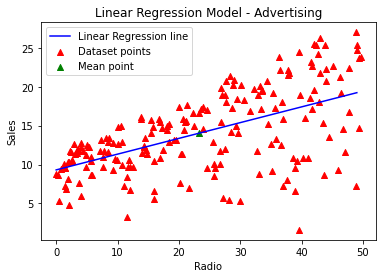

In [5]:
plt.scatter(df['radio'],df['sales'],color="red", marker="^",label='Dataset points')
plt.scatter(x_mean,y_mean,color="green",marker="^",label='Mean point')

x=np.arange(0,50)
plt.plot(x,m*x+c,color="blue",label='Linear Regression line')
plt.title('Linear Regression Model - Advertising')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()